In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from sklearn.metrics import pairwise_distances_argmin
from collections import Counter , defaultdict

In [9]:
def read_csv():
  x = []
  y = []
  countries = []
  x_label = ""
  y_label = ""
  with open('/dataBoth.csv') as csvfile:
    reader = csv.reader(csvfile,delimiter = ',')
    lines=0
    for row in reader:
      if lines >= 1:
        print(','.join(row))
        x.append(float(row[1]))
        y.append(float(row[2]))
        countries.append(row[0])
        lines +=1
      else:
        x_label=row[1]
        y_label=row[2]
        print(','.join(row))
        lines+=1
  return x,y,x_label,y_label,countries

In [13]:
x , y ,x_label , y_label , countries = read_csv()

Countries,BirthRate(Per1000),LifeExpectancy
(2008)Afghanistan,46.613,47.532
(2008)Albania,14.69,76.492
(2008)Algeria,20.804,72.44
(2008)Angola,42.908,49.879
(2008)Argentina,17.372,75.387
(2008)Armenia,15.222,73.794
(2008)Aruba,11.846,74.811
(2008)Australia,12.741,81.567
(2008)Austria,9.138,80.51
(2008)Azerbaijan,19.,70.15
(2008)Bahamas,16.863,74.848
(2008)Bahrain,18.151,74.675
(2008)Bangladesh,21.589,68.007
(2008)Barbados,11.237,76.343
(2008)Belarus,9.97,69.194
(2008)Belgium,11.293,79.777
(2008)Belize,24.916,75.388
(2008)Benin,39.599,54.86
(2008)Bhutan,21.522,66.066
(2008)Bolivia,27.349,65.701
(2008)Bosnia and Herzegovina,9.168,75.221
(2008)Botswana,24.676,52.812
(2008)Brazil,16.405,72.464
(2008)Brunei,20.061,77.6
(2008)Bulgaria,9.558,73.317
(2008)Burkina Faso,47.819,54.065
(2008)Burundi,34.581,49.054
(2008)Cambodia,24.89,61.736
(2008)Cameroon,37.113,50.194
(2008)Canada,10.625,80.743
(2008)Cape Verde,24.261,73.587
(2008)Central African Rep.,35.623,46.217
(2008)Chad,45.84,48.634
(2008)C

In [14]:
X = np.vstack((x,y)).T

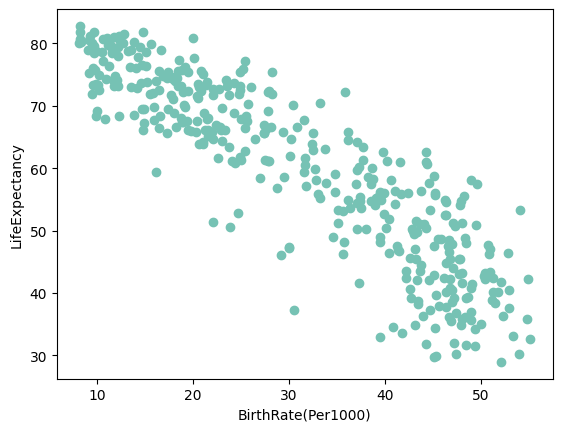

In [15]:
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.scatter(x,y,color='#76c2b4')
plt.show()

In [18]:
def find_clusters(X, n_clusters , rseed=2):
  rng=np.random.RandomState(rseed)
  i = rng.permutation(X.shape[0])[:n_clusters]
  centers = X[i]
  print("\nConverging centers:")
  while True:
    labels = pairwise_distances_argmin(X,centers)

    new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])

    if np.all(centers == new_centers):
      break
    centers = new_centers

    print(centers)
    print()
  return centers,labels

In [19]:
clust_num =3


Converging centers:
[[44.57815517 46.74231908]
 [17.73084722 74.58257639]
 [23.56848649 62.46040541]]

[[44.58846471 46.02553835]
 [15.67448148 75.03451852]
 [27.10132184 63.69106897]]

[[44.79066463 45.53448488]
 [15.13382576 74.87149242]
 [28.23515625 64.0045    ]]

[[44.88678882 45.29605913]
 [15.10550758 74.83895455]
 [28.61827273 63.87592929]]

[[45.02339241 45.09949063]
 [15.21742537 74.77223881]
 [29.01078    63.49925   ]]

[[45.19067532 44.82095143]
 [15.38079562 74.66975182]
 [29.5779802  62.99942574]]

[[45.29201325 44.58267232]
 [15.61799296 74.45969014]
 [30.27333333 62.52388889]]

[[45.76114685 44.09755608]
 [15.80928276 74.39649655]
 [30.93960577 61.55463462]]

[[46.08932847 43.68644175]
 [15.92888514 74.23355405]
 [31.60930841 60.96743925]]

[[46.2523985  43.36952271]
 [16.16863636 73.91255844]
 [32.4987619  60.42327619]]

[[46.39058462 43.14575015]
 [16.64487805 73.51066463]
 [33.60584694 59.49416327]]

[[46.609128   42.77589216]
 [16.78936527 73.39014371]
 [34.23944  

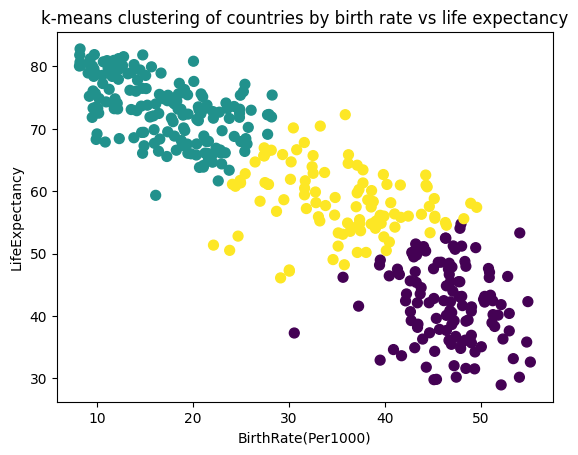

In [21]:
centers , labels = find_clusters(X,clust_num)
plt.scatter(X[:,0],X[:,1],c=labels,s=50,cmap='viridis')
plt.title('k-means clustering of countries by birth rate vs life expectancy')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

In [22]:
print("\n The number of countries in each cluster:")
print(Counter(labels))

clusters_indices = defaultdict(list)
for index, c in enumerate(labels):
  clusters_indices[c].append(index)

x=0
while x <clust_num:
  print("\n cluster" + str(x+1))
  print("------------")
  for i in clusters_indices[x]:
    print(countries[i])
  print("---------")
  print("mean birth rate:")
  print(centers[x][0])
  print("mean life expectancy:")
  print(centers[x][1])
  x+=1



 The number of countries in each cluster:
Counter({1: 171, 0: 118, 2: 103})

 cluster1
------------
(2008)Afghanistan
(2008)Angola
(2008)Burkina Faso
(2008)Central African Rep.
(2008)Chad
(2008)Congo  Dem. Rep.
(2008)Guinea-Bissau
(2008)Mali
(2008)Mozambique
(2008)Niger
(2008)Sierra Leone
(2008)Somalia
(2008)Uganda
(2008)Zambia
(1953)Afghanistan
(1953)Algeria
(1953)Angola
(1953)Bahrain
(1953)Bangladesh
(1953)Benin
(1953)Bhutan
(1953)Bolivia
(1953)Botswana
(1953)Brazil
(1953)Burkina Faso
(1953)Burundi
(1953)Cambodia
(1953)Cameroon
(1953)Cape Verde
(1953)Central African Rep.
(1953)Chad
(1953)China
(1953)Colombia
(1953)Comoros
(1953)Congo  Dem. Rep.
(1953)Congo  Rep.
(1953)Cote d'Ivoire
(1953)Djibouti
(1953)Dominican Rep.
(1953)Ecuador
(1953)Egypt
(1953)El Salvador
(1953)Equatorial Guinea
(1953)Eritrea
(1953)Ethiopia
(1953)Fiji
(1953)French Polynesia
(1953)Gabon
(1953)Gambia
(1953)Ghana
(1953)Guatemala
(1953)Guinea
(1953)Guinea-Bissau
(1953)Guyana
(1953)Haiti
(1953)Honduras
(1953)India
(